# Presentación

## Introducción

**TUIA - Minería de Datos** - 2023

---

**Trabajo Práctico Nº 1:**

*   "Unidades 2 y 3"


**Alumno:**  

*   Miguel Mussi

## Objetivo

El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 2 y 3
en un problema real asociado a los cultivos.

## Actividades

1. Descargar un conjunto de datos, Crop_recommendation.csv, para realizar el trabajo práctico.

2. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de
datos, etc.) y elegir un método de estandarización.

3. Realizar PCA y determinar el número de componentes principales considerando alguno
de los 3 criterios datos en la práctica. Graficar la varianza acumulada y las componentes
de PCA en un grafico 2 o 3D con sus respectivas clases.

4. Aplicar Isomap y analizar los resultados obtenidos variando el numero de vecinos y
componentes. Realizar un grafico en 2D de utilizando dos componentes.

5. Aplicar t-SNE y analizar los resultados obtenidos variando el número de iteraciones,
componentes y perplejidad. Realizar un gráfico en 2D de utilizando dos componentes.

6. Aplicar K-means y analizar los resultados obtenidos variando el número de clusters y
obtener el número óptimo de clusters mediante GAP. Realizar un gráfico en 3D de
utilizando tres atributos de los datos y donde los colores estén asociados a los clusters.

7. Aplicar clustering jerárquico y determinar cuál número sería el que mejor represente los
datos. Utilizar el score de Silhouette y calcular el número óptimo de cluster por medio de
GAP.


# Desarrollo del TP

In [49]:
#@title Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
# pip install umap-learn
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,silhouette_samples
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN

In [2]:
#@title Sincronización con Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title DataFrame

# Path 1 - Referenciado a la carpeta de Drive
file_path= '/content/drive/MyDrive/UNR/4 - Minería de Datos (IA43)/TP1/Crop_recommendation.csv'
df = pd.read_csv(file_path, sep=',', engine='python')

# Path 2 - Referenciado al mismo directorio
#df_original = pd.read_csv('Crop_recommendation.csv', sep=',', engine='python')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Análisis exploratorio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Recategorización del atributo "label".

In [6]:
#Se convierte el tipo de "label" a categoría.
df['label'] = df['label'].astype('category')

Análisis de datos nulos o faltantes

In [7]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Se observa que no existen valores nulos ni faltantes.

Se analiza la distribución equitativa de las clases "label"

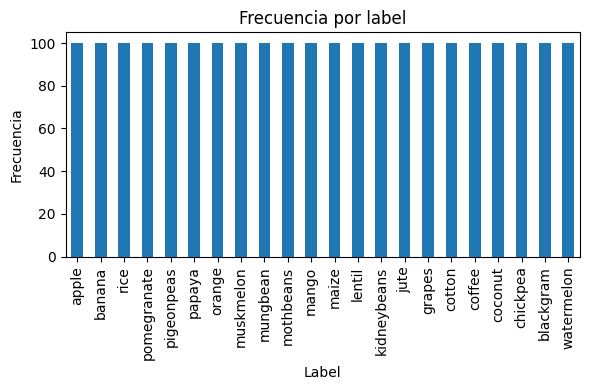

In [8]:
#@title Cantidad de registros por label

# Agrupar por etiqueta y contar la frecuencia
lbl_frec = df['label'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
lbl_frec.plot(kind='bar')
plt.title('Frecuencia por label')
plt.xlabel('Label')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [9]:
print(lbl_frec)

apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: label, dtype: int64


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


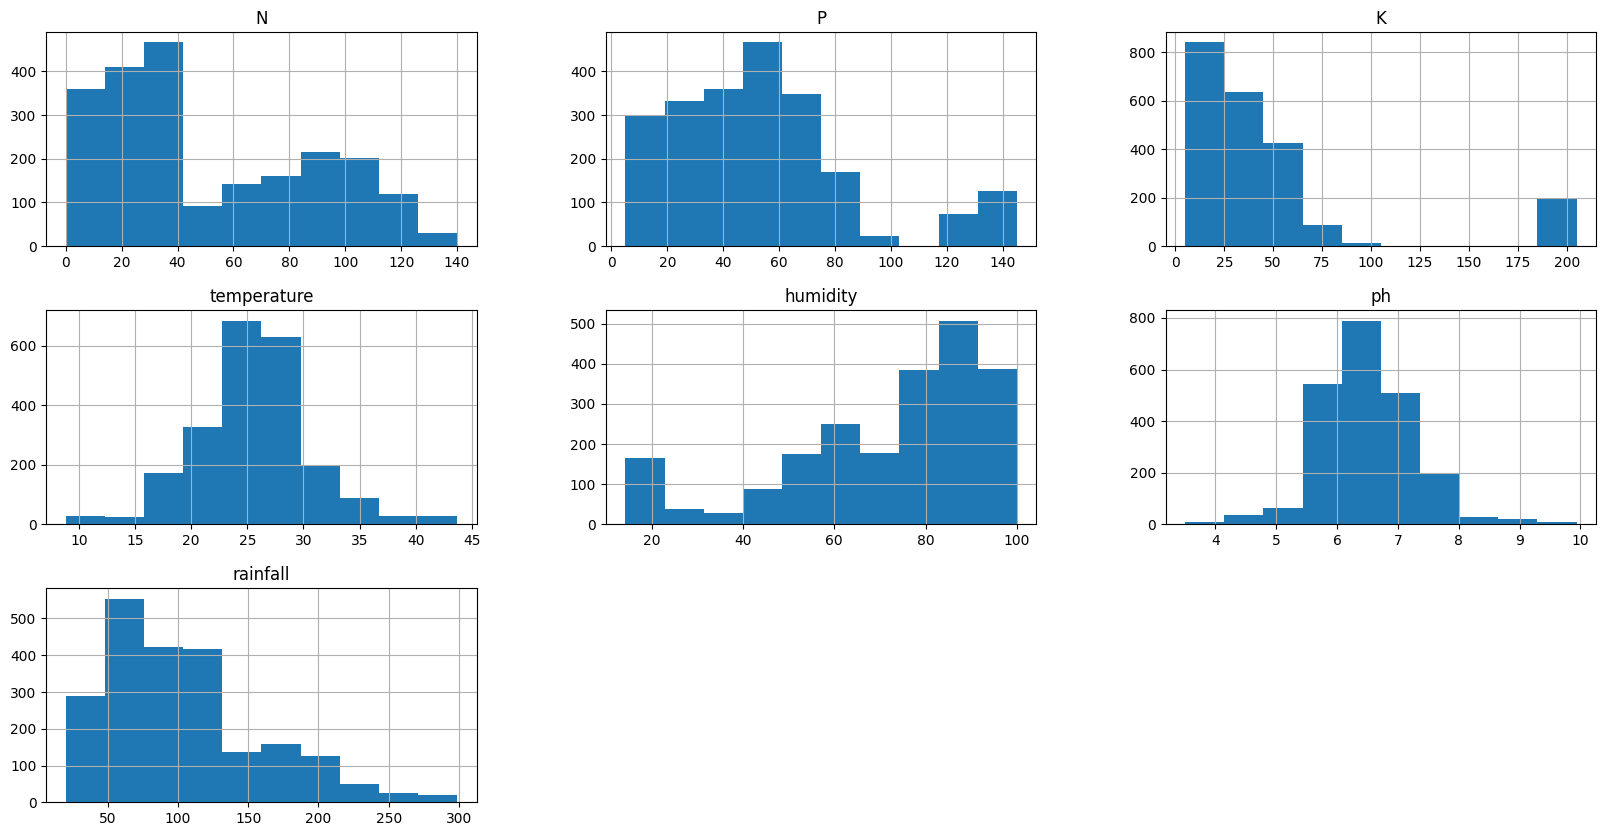

In [11]:
#@title Histogramas

df.hist(figsize=(20,10))
plt.show()

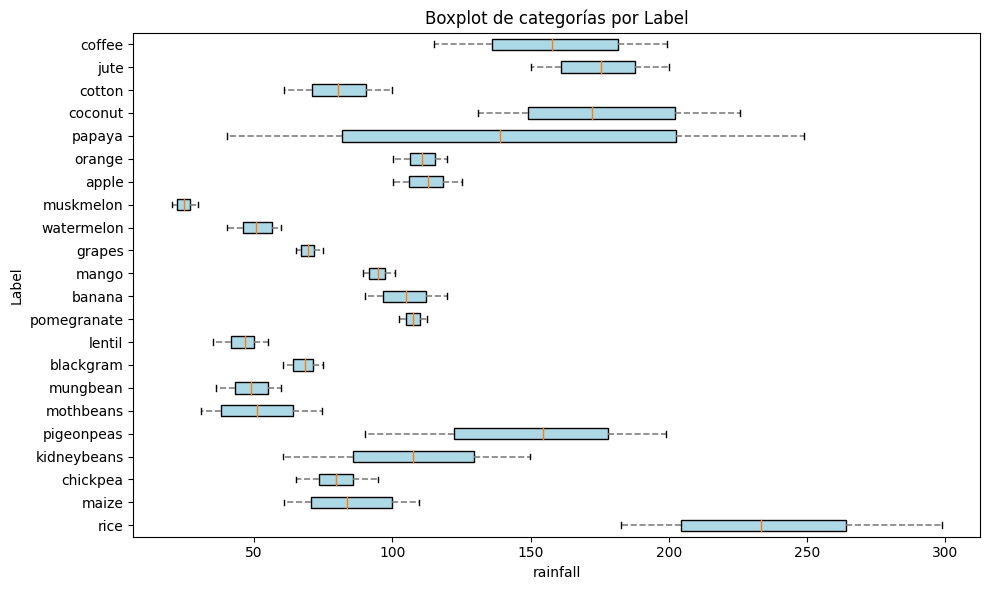

In [12]:
#@title Boxplot por 'labels' variables

# Variable a analizar
target = 'rainfall'

# Configuración de estilo y tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de boxplot con barrios en el eje vertical y precios en el eje horizontal
boxplot = plt.boxplot([df[df['label'] == label][target] for label in df['label'].unique()],
                      vert=False,  # Boxplots horizontales
                      patch_artist=True)  # Para personalizar colores de los cuadros

# Personalizar el color de los cuadros (box) y los bigotes (whisker)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.2, linestyle='--')

# Etiquetas y título del gráfico
plt.yticks(range(1, len(df['label'].unique()) + 1), df['label'].unique())  # Etiquetas en el eje y
plt.xlabel(target)
plt.ylabel('Label')
plt.title('Boxplot de categorías por Label')

# Desactivar notación científica en el eje horizontal (precios)
plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Datos interesantes

In [13]:
# Cultivos con condiciones extremas
print("Algunas observaciones interesantes")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", df[df['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", df[df['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", df[df['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", df[df['ph'] > 9]['label'].unique())

Algunas observaciones interesantes
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes', 'apple']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes', 'apple']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
Crops which requires very High Rainfall: ['rice', 'papaya', 'coconut']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']

In [14]:
# Cultivos estacionales
print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas', 'mothbeans', 'blackgram', 'mango', 'grapes', 'orange', 'papaya']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
-----------------------------------
Winter Crops
['maize', 'pigeonpeas', 'lentil', 'pomegranate', 'grapes', 'orange']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
-----------------------------------
Rainy Crops
['rice', 'papaya', 'coconut']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']


## Correlaciones entre atributos

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### Matriz de correlación

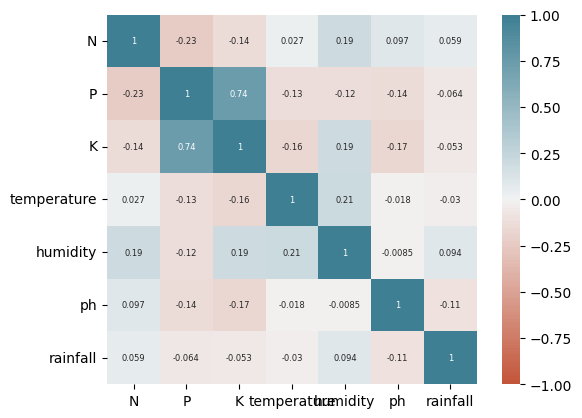

In [16]:
corr = df.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.show()

### Estandarización

In [17]:
#@title Estandarización Z-score por cálculo
df_sub1 = df.drop(['label'], axis=1)
df_std1 = (df_sub1-df_sub1.mean())/df_sub1.std()
df_std1

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


In [18]:
#@title Estandarización Z-score por librería
df_sub = df.drop(['label'], axis=1) # Eliminación de variables no numéricas
scaler = StandardScaler() # Creación del objeto scaler
X_scaled = scaler.fit_transform(df_sub) # Cálculo de la media y la desviación estándar y aplicación de la transformación de estandarización.
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)
df_std

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


# PCA

### Aplicación de la técnica

In [19]:
#@title Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1])

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['label'] = df['label']

In [20]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582869,-0.844586,1.373343,-1.614129,0.308224,-0.095997,-0.025239,rice
1,-0.474635,-0.784895,1.252178,-1.792762,1.107745,-0.532255,-0.280543,rice
2,-0.634068,-0.694522,1.179332,-1.818106,2.523263,-0.538551,-0.105967,rice
3,-1.047920,-1.087658,1.393351,-0.982401,1.448781,-0.656929,0.275272,rice
4,-0.873258,-0.658673,1.455685,-2.335012,1.959633,-0.318025,0.052740,rice
...,...,...,...,...,...,...,...,...
2195,-1.260921,-0.618363,0.711297,-1.014970,0.133230,-1.122259,0.307025,coffee
2196,-1.355583,-0.154043,0.701649,-0.197683,-0.898658,-0.771476,0.684957,coffee
2197,-1.158384,-0.640475,1.045840,-1.301841,-0.491765,-0.885129,0.203463,coffee
2198,-1.219188,0.052390,0.180855,-0.990499,-0.601388,-1.308967,0.509656,coffee


### Eigenvectors

Son los valores que conforman los coeficientes de cada una de las nuevas variables.

In [21]:
#@title Eigenvectors
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


### Selección del número de componentes principales

In [22]:
# Función para acumular la varianza
def var_acum(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [23]:
var_c = var_acum(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulada de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulada de variancia explicada
0,1.932096,0.275888,0.275888
1,1.294499,0.184844,0.460733
2,1.076999,0.153787,0.614520
3,1.023356,0.146127,0.760647
4,0.806295,0.115133,0.875780
5,0.676869,0.096652,0.972431
6,0.193069,0.027569,1.000000


Vemos gráficamente la varianza acumulada:

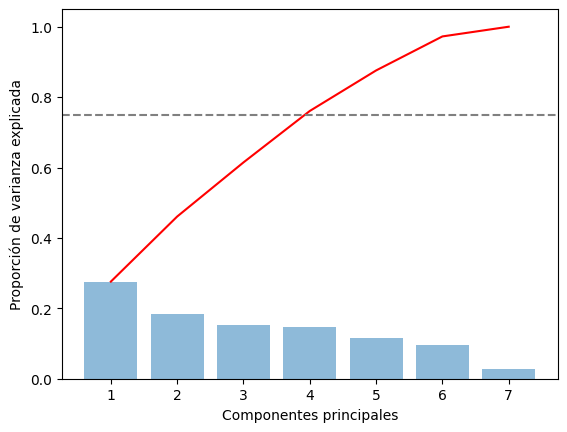

In [24]:
wish = 0.75
plt.bar(range(1, 8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
# modificado para reemplazar el escalonado por la curva
plt.plot(range(1, 8), np.cumsum(pca.explained_variance_ratio_),
         color='red')
# agregada línea horizontal para un valor determinado
plt.axhline(y=wish, color='gray', linestyle='--')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.show()

### Criterios de selección:

* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Las tres primeras componentes acumulan el 65% ~ 70% de la variabilidad total, es decir, están cercanas a cumplir con el primer criterio (>~75%). Si se consideraran las componentes cuyos eigenvalues son superiores a 1 (Criterio de Kaiser) se debería optar por extraer cuatro. Por conveniencia y practicidad para graficar las distribuciones de las componentes se decide seleccionar tres de ellas (primer citerio)

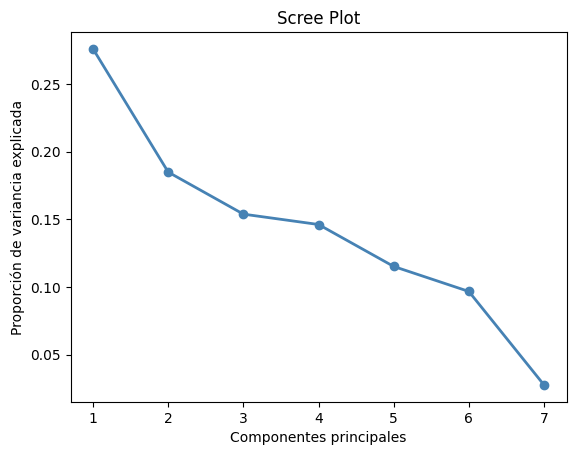

In [25]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

Al observar el gráfico del codo, vemos que el quiebre parece producirse entre la segunda y tercera componente. Considerando la primera y la segunda componentes llegaríamos a un ~60% de la variabilidad total, por lo que consideramos óptimo tomar hasta la tercera componente.

### Matriz de correlación de PC seleccionados

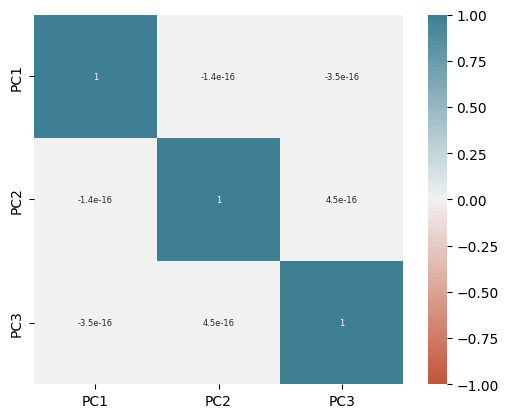

In [26]:
corr = pca_df[['PC1', 'PC2', 'PC3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.show()

### Scatter plots

In [27]:
df.drop(columns=['label']).columns.to_list()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [28]:
features = df.drop(columns=['label']).columns.to_list()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'} )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig.show()

# Isomap

## Aplicación de la técnica

In [29]:
#@title Gráfico

import warnings
warnings.filterwarnings('ignore')

isomap_df = Isomap(n_neighbors=4, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

# T-SNE

## Aplicación de la técnica

In [30]:
#@title Gráfico
tsne = TSNE(n_components=3, random_state=0, perplexity=8)
projections_tsne = tsne.fit_transform(df_std, )

fig = px.scatter_3d(
    projections_tsne, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

# UMAP

## Aplicación de la técnica

In [31]:
warnings.filterwarnings('ignore')

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df_std)
proj_3d = umap_3d.fit_transform(df_std)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig_3d.update_traces(marker_size=8)

fig_2d.show()
fig_3d.show()

# K-Means

## Método del codo

El objetivo es identificar un punto en el gráfico donde la disminución en la suma de las distancias intraclúster (también conocida como inercia) comienza a disminuir de manera significativamente más lenta. Este punto se denomina "codo" y sugiere el número óptimo de clústeres para el conjunto de datos.

La inercia en K-means se calcula sumando las distancias cuadradas entre cada punto de datos y el centroide de su grupo asignado, y luego sumando estas distancias para todos los puntos en el conjunto de datos.

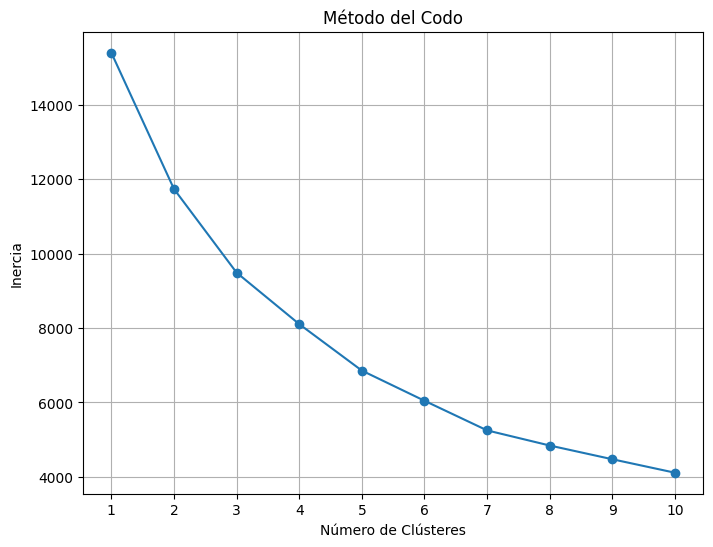

In [32]:
import warnings
warnings.filterwarnings('ignore')

#@title Cálculo de la inercia
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

## GAP Statistic

In [33]:
def calculate_intra_cluster_dispersion(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    centroids = np.array([np.mean(X_scaled[labels == i], axis=0) for i in range(k)])
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_scaled[labels] - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion

In [34]:
gaps = []
max_k = 15
for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion(X_scaled, k, linkage='ward')

    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*X_scaled.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 1


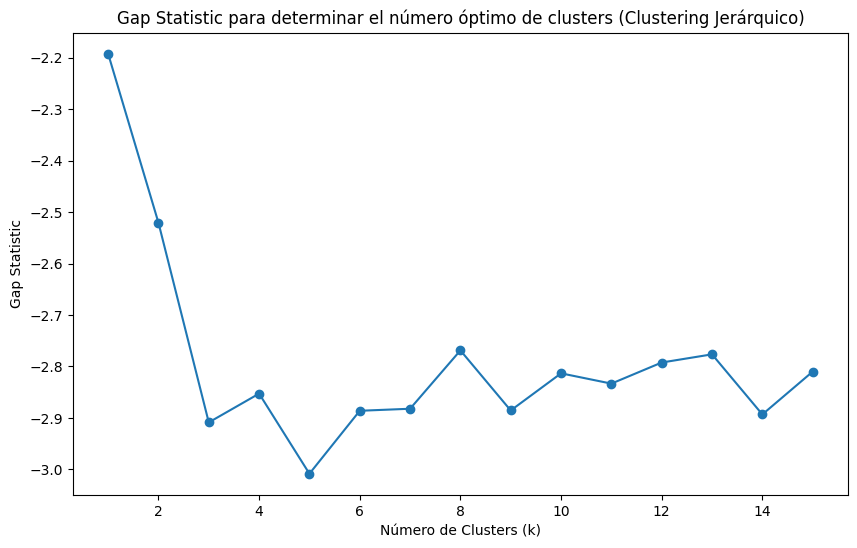

In [35]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.show()

## Aplicación de la técnica

In [36]:
#@title Creación del modelo
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
df['Cluster KMeans'] = kmeans.labels_

In [37]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [38]:
#@title Interpretación
df.groupby('Cluster KMeans').mean()

,N,P,K,temperature,humidity,ph,rainfall
Cluster KMeans,,,,,,,
0,21.990,133.3750,200.000,23.240259,87.104305,5.977800,91.133304
1,53.408,45.3615,32.964,25.853842,69.919527,6.518648,104.696691


In [39]:
x = df.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', ..., 'pomegranate', 'mango', 'orange', 'papaya', 'coconut']
Length: 13
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
---------------------------------------------------------------
Crops in Second Cluster: ['maize', 'banana', 'watermelon', 'muskmelon', 'papaya', 'cotton', 'coffee']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes', 'apple']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
---------------------------------------

In [40]:
#@title Centroides
# caracteristicas normalizadas que tendria el centroide de ese cluster.
kmeans.cluster_centers_

array([[-0.77384547,  2.42620348,  2.99884775, -0.46932134,  0.70185995,
        -0.63544139, -0.22440896],
       [ 0.07738455, -0.24262035, -0.29988477,  0.04693213, -0.070186  ,
         0.06354414,  0.0224409 ]])

In [41]:
observaciones_por_cluster = df['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

0     200
1    2000
Name: Cluster KMeans, dtype: int64

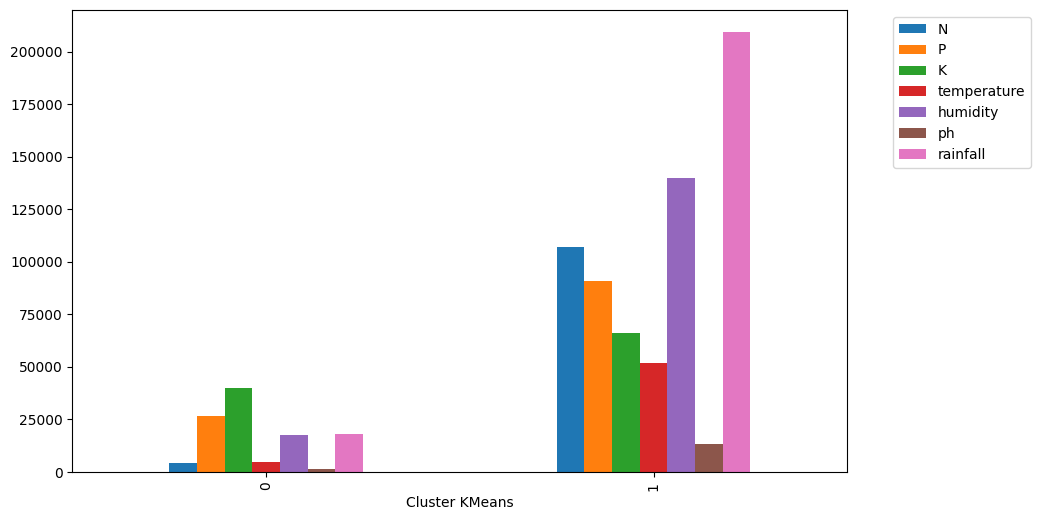

In [42]:
df.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

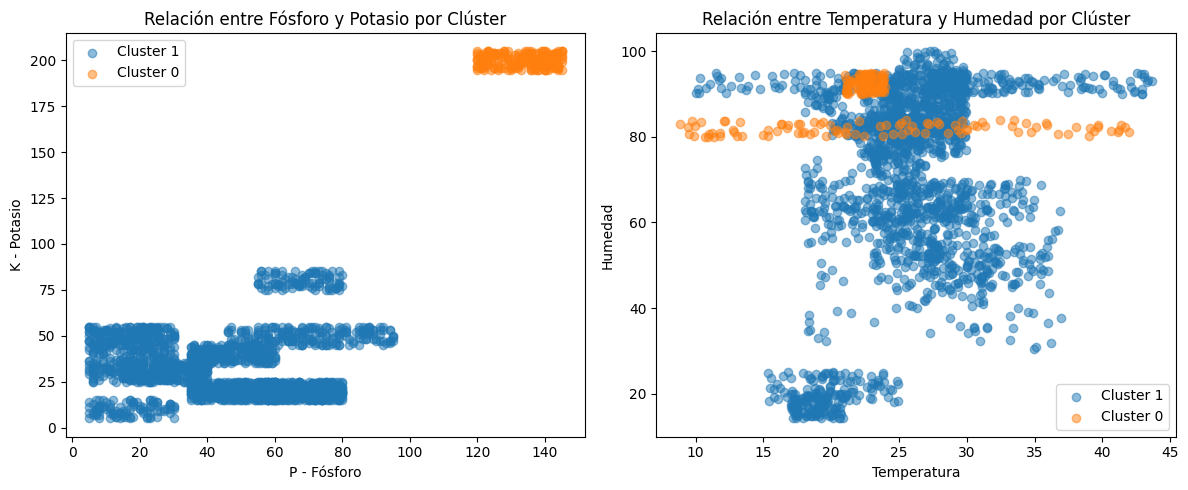

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.sca(ax[0])
for cluster_label in df['Cluster KMeans'].unique():
    cluster_data = df[df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['P'], cluster_data['K'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('P - Fósforo')
plt.ylabel('K - Potasio')
plt.title('Relación entre Fósforo y Potasio por Clúster')
plt.legend()

plt.sca(ax[1])
for cluster_label in df['Cluster KMeans'].unique():
    cluster_data = df[df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['temperature'], cluster_data['humidity'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Relación entre Temperatura y Humedad por Clúster')
plt.legend()

plt.tight_layout()

plt.show()

In [44]:
# Comprobación de la distribución de los clusters mediante PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(X_scaled)

In [45]:
componentes_principales

array([[-0.58286944, -0.84458562],
       [-0.47463491, -0.78489453],
       [-0.63406838, -0.69452246],
       ...,
       [-1.15838352, -0.64047494],
       [-1.21918792,  0.05238989],
       [-1.3730036 ,  0.05581764]])

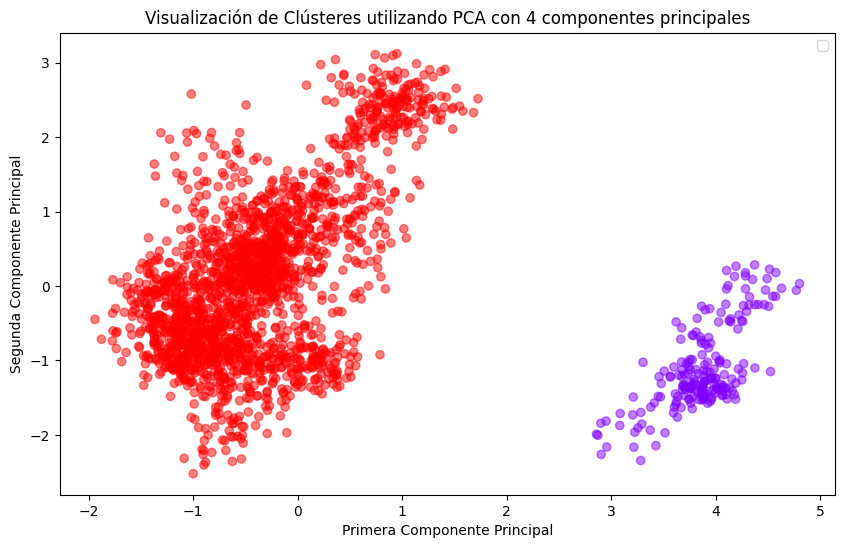

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c=df['Cluster KMeans'] ,cmap='rainbow', alpha=0.5)
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Visualización de Clústeres utilizando PCA con 4 componentes principales')
plt.legend()
plt.show()

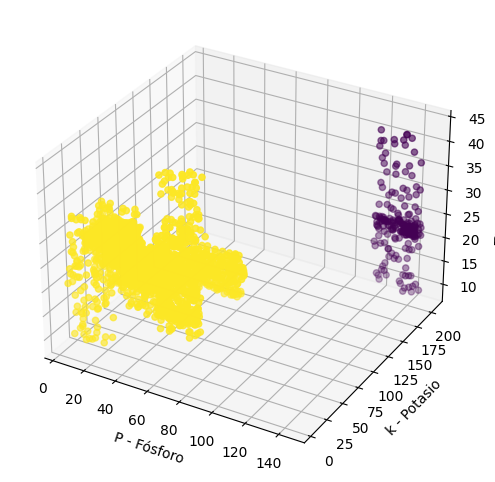

In [47]:
# Crear una figura 3D
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['P'], df['K'], df['temperature'], c=df['Cluster KMeans'])

# Etiqueta los ejes
ax.set_xlabel('P - Fósforo')
ax.set_ylabel('k - Potasio')
ax.set_zlabel('Temperatura')

plt.show()

# Clustering jerárquico

## Coeficiente de Silhouette

In [50]:
def calculate_silhouette(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 15

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(X_scaled, k)
    silhouette_scores.append(silhouette_avg)

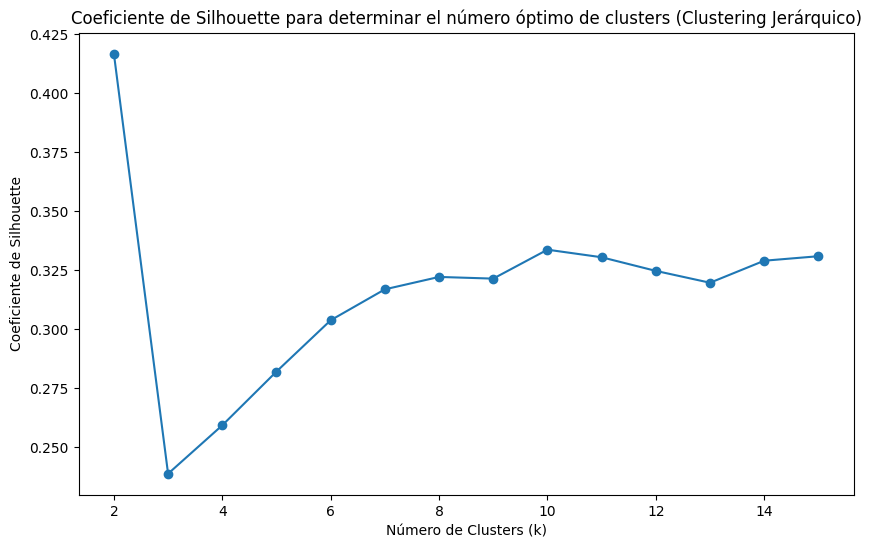

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.show()

## Aplicación de la técnica

In [52]:
Z = linkage(X_scaled, "ward")

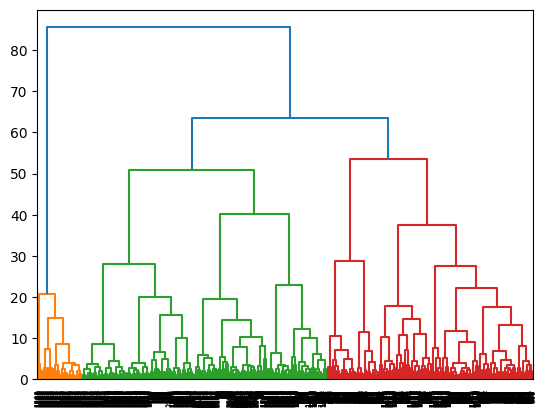

In [53]:
dendrogram(Z)
plt.show()

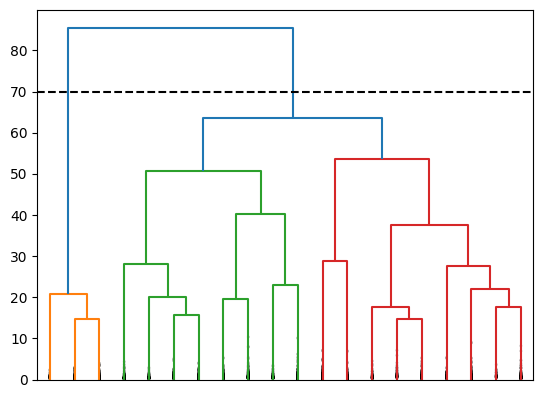

In [54]:
dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = False, show_contracted = True)
plt.axhline(y=70, c='k', linestyle='dashed')
plt.show()

In [55]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 30):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(X_scaled)

    # Calculo la matriz de distancias entre puntos
    pairwise_distances = cdist(X_scaled, X_scaled, 'euclidean')

    # Calculo la distancia total entre los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()

    distancias.append(distancia_total)

In [56]:
distancias

[17058189.29179289,
 12839873.769239698,
 5771152.809833191,
 4578862.226983887,
 2739319.956164443,
 2217358.4370020335,
 1570925.837680053,
 1493887.5838907082,
 1214855.4864271856,
 1087358.9778445202,
 1007601.8568084423,
 827771.0896283165,
 800052.4177084571,
 712927.7787916362,
 615049.5635864248,
 556846.2556359834,
 513723.1614459406,
 473692.4813045332,
 447317.15459856135,
 415859.3615766928,
 378958.5898211967,
 346393.01925688895,
 327944.0352273538,
 309901.4234504907,
 301672.44561912876,
 292505.7882367406,
 287390.32242592465,
 277904.27251353656,
 255933.9960082611]

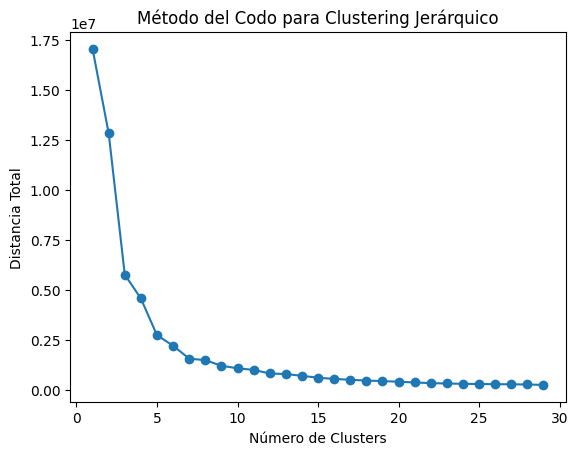

In [57]:
plt.plot(range(1, 30), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

In [61]:
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(X_scaled)

df['Cluster'] = cluster_assignments

In [62]:
df['Cluster'].value_counts()

0    2000
1     200
Name: Cluster, dtype: int64

In [63]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(X_scaled, cluster_assignments)
silhouette_avg

0.4168458131187345

## DBSCAN y HDBSCAN

In [64]:
!pip install hdbscan

In [65]:
dbscan = DBSCAN(eps=1, min_samples=100)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Elimino duplicados para ver cuantos grupos tengo y veo la cantidad que tengo
groups = len(set(dbscan_labels))
#Evaluo cual de ellos es ruido (si es -1)
count_noise = (1 if -1 in dbscan_labels else 0)

print("Número de clústeres identificados por DBSCAN:", groups - count_noise)

Número de clústeres identificados por DBSCAN: 4


In [66]:
hdbscan = HDBSCAN(min_cluster_size=100)
hdbscan_labels = hdbscan.fit_predict(X_scaled)
print("Número de clústeres identificados por HDBSCAN:", len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0))

Número de clústeres identificados por HDBSCAN: 2


In [67]:
df['Cluster DBSCAN'] = dbscan_labels
df['Cluster HDBSCAN'] = hdbscan_labels

In [68]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans,Cluster,Cluster DBSCAN,Cluster HDBSCAN
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1,0,-1,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1,0,-1,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1,0,-1,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1,0,-1,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1,0,-1,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1,0,-1,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1,0,-1,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1,0,-1,1


In [69]:
x = df.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', ..., 'pomegranate', 'mango', 'orange', 'papaya', 'coconut']
Length: 13
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
---------------------------------------------------------------
Crops in Second Cluster: ['maize', 'banana', 'watermelon', 'muskmelon', 'papaya', 'cotton', 'coffee']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes', 'apple']
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']
---------------------------------------

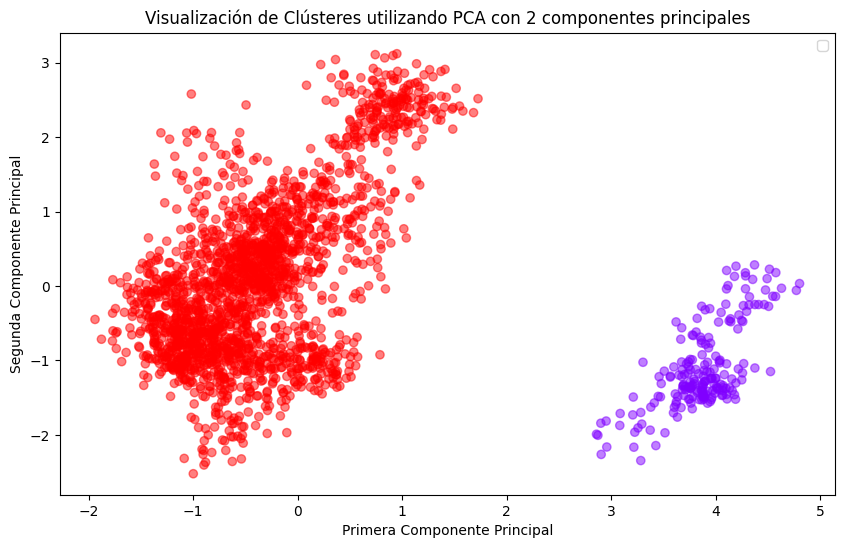

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c=df['Cluster KMeans'] ,cmap='rainbow', alpha=0.5)
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Visualización de Clústeres utilizando PCA con 2 componentes principales')
plt.legend()
plt.show()